# Initial Setup

In [1]:
import cv2
import matplotlib.pyplot as plt

plt.style.use('default')

import os
if not os.path.exists('out'):
    os.makedirs('out')

from utils.utils import save_ar_video_f2r, save_ar_video_f2f, save_ar_video

#reloads external modules when they are changed
%load_ext autoreload
%autoreload 2

# Overview of the data

In [24]:
video_filename = './Data/Multiple View.avi'

reference_frame = cv2.cvtColor(cv2.imread('Data/ReferenceFrame.png', cv2.IMREAD_COLOR), cv2.COLOR_BGR2RGB)
reference_mask = cv2.imread('Data/ObjectMask.PNG', cv2.IMREAD_GRAYSCALE)

ar_layer = cv2.cvtColor(cv2.imread('Data/AugmentedLayer.PNG', cv2.IMREAD_COLOR), cv2.COLOR_BGR2RGB)[:,:640]
ar_mask = cv2.imread('Data/AugmentedLayerMask.PNG', cv2.IMREAD_GRAYSCALE)[:,:640]


## Reference frame

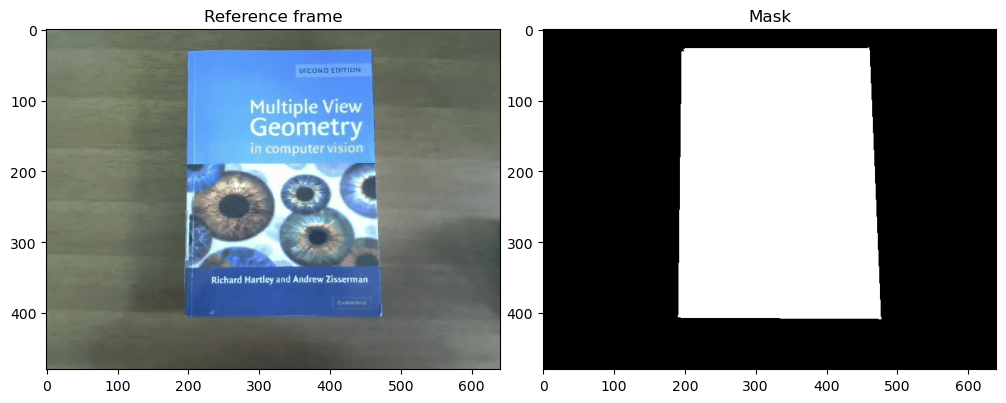

In [25]:
w, h, dpi = 1000, 500, 100
fig, ax = plt.subplots(ncols=2, figsize=(w/dpi, h/dpi), dpi=dpi)

ax[0].imshow(reference_frame)
ax[0].set_title('Reference frame')

ax[1].imshow(reference_mask, cmap='gray')
ax[1].set_title('Mask')

fig.tight_layout(pad=0.5)
plt.show()

## AR layer

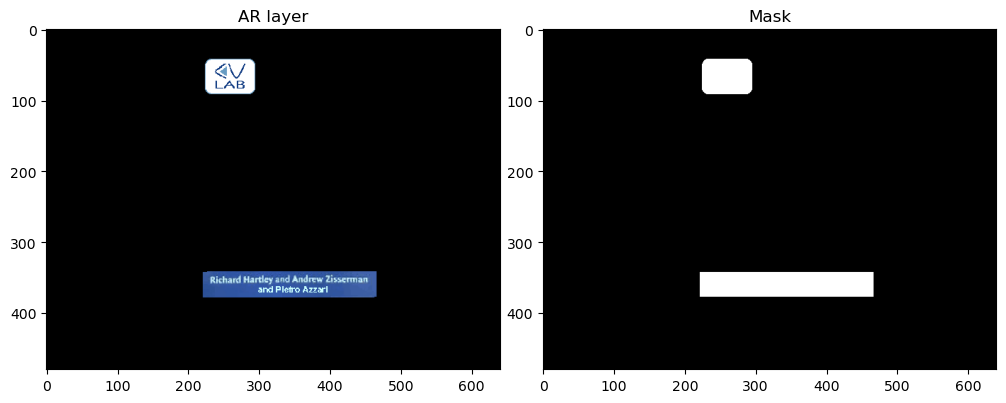

In [26]:
w, h, dpi = 1000, 500, 100
fig, ax = plt.subplots(ncols=2, figsize=(w/dpi, h/dpi), dpi=dpi)

ax[0].imshow(ar_layer)
ax[0].set_title('AR layer')

ax[1].imshow(ar_mask, cmap='gray')
ax[1].set_title('Mask')

fig.tight_layout(pad=0.5)
plt.show()

# Stitch AR layer onto reference frame

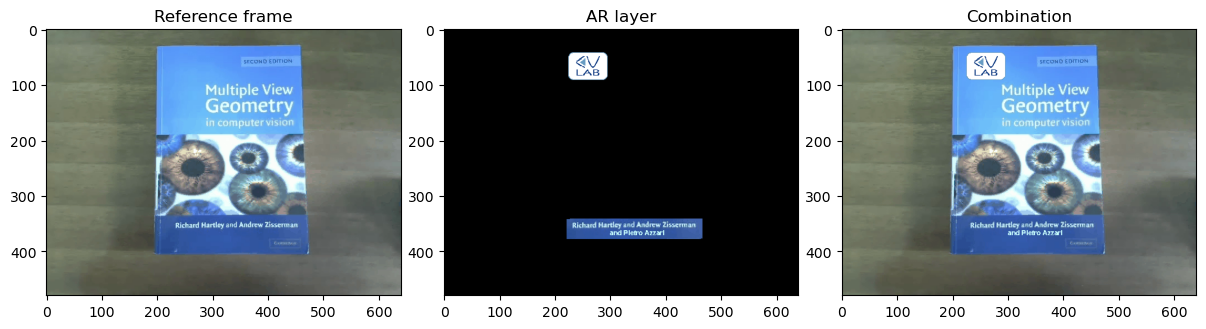

In [27]:
ar_frame = reference_frame.copy()
ar_frame[ar_mask==255] = ar_layer[ar_mask==255]

w, h, dpi = 1200, 400, 100
fig, ax = plt.subplots(ncols=3, figsize=(w/dpi, h/dpi), dpi=dpi)

ax[0].imshow(reference_frame)
ax[0].set_title('Reference frame')

ax[1].imshow(ar_layer)
ax[1].set_title('AR layer')

ax[2].imshow(ar_frame)
ax[2].set_title('Combination')

fig.tight_layout(pad=0.5)
plt.show()

# Do AR on the video
Overlay the AR layer onto the video frame.

At the beginning, the AR layer and a reference image onto which the AR layer should be stitched are needed.

Then the homography between the reference image and the video frame is computed using local invariant features, and it is then applied to the AR layer. The feature algorithms tested here are:
 - SIFT: accurate, but slow
 - BRISK: faster, but less accurate
 - ORB: even faster, even less accurate

The homography between the reference image and the video frames is found using local invariant features. The matches between the descriptors are then using FLANN KDTree. The homography on the resulting matches is computed using RANSAC.

All this is implemented in the ``matchers.FeatureMatcher`` class.

To find the correct homography between the reference image and the video frame 3 approaches are tried:
 - F2R (frame to reference): here, the homography between the reference image and each video frame is computed. Here, it is harder to find the right correspondance between the reference image and the video frame. The result is jittering of the AR layer, which is made worse by using a low accuracy feature matching algorithm. As can be seen in the result video, SIFT produces the best results here, albeit with a performance hit.
 - F2F (frame to frame): the homography between the reference image and the first video frame is computed first (in this specific example, it is the identity), and then the homographies between each pair of subsequent frames is computed. This tends to produce smoother results, but the AR layer drifts over time. Less accurate algorithms produce more drift
 - Hybrid: every 30 frames, a F2F correspondance using SIFT is found, then a F2R with a faster algorithm (BRISK in this case) is done. This has the benefit of both approaches, as it enables to have the performance of the faster algorithm, with limited drift.

Having said this, visually the best results are still achieved with F2R using SIFT.

## F2R

SIFT feature matching

In [30]:
save_ar_video_f2r(video_filename,
                  'out/f2r_sift.avi',
                  ar_layer=ar_layer,
                  ar_mask=ar_mask,
                  reference_image=reference_frame,
                  reference_mask=reference_mask,
                  algorithm_f2r=cv2.SIFT_create())

Computing homographies
frame 419 of 419                                                                
Time for matching: 33s

Writing video
frame 419 of 419                                                                
Time for writing video: 2.7s


BRISK feature matching

In [17]:
save_ar_video_f2r(video_filename,
                  'out/f2r_brisk.avi',
                  ar_layer=ar_layer,
                  ar_mask=ar_mask,
                  reference_image=reference_frame,
                  reference_mask=reference_mask,
                  algorithm_f2r=cv2.BRISK_create())

Computing homographies
frame 419 of 419                                                                
Time for matching: 23s

Writing video
frame 419 of 419                                                                
Time for writing video: 2.7s


ORB feature matching

In [18]:
save_ar_video_f2r(video_filename,
                  'out/f2r_orb.avi',
                  ar_layer=ar_layer,
                  ar_mask=ar_mask,
                  reference_image=reference_frame,
                  reference_mask=reference_mask,
                  algorithm_f2r=cv2.ORB_create())

Computing homographies
frame 419 of 419                                                                
Time for matching: 26s

Writing video
frame 419 of 419                                                                
Time for writing video: 3s


## F2F

SIFT feature matching

In [19]:
save_ar_video_f2f(video_filename,
                  'out/f2f_sift.avi',
                  ar_layer=ar_layer,
                  ar_mask=ar_mask,
                  reference_image=reference_frame,
                  reference_mask=reference_mask,
                  algorithm_f2f=cv2.SIFT_create())

Computing homographies
frame 419 of 419                                                                
Time for matching: 34s

Writing video
frame 419 of 419                                                                
Time for writing video: 2.7s


BRISK feature matching

In [20]:
save_ar_video_f2f(video_filename,
                  'out/f2f_brisk.avi',
                  ar_layer=ar_layer,
                  ar_mask=ar_mask,
                  reference_image=reference_frame,
                  reference_mask=reference_mask,
                  algorithm_f2f=cv2.BRISK_create())

Computing homographies
frame 419 of 419                                                                
Time for matching: 23s

Writing video
frame 419 of 419                                                                
Time for writing video: 2.9s


ORB feature matching

In [32]:
save_ar_video_f2f(video_filename,
                  'out/f2f_orb.avi',
                  ar_layer=ar_layer,
                  ar_mask=ar_mask,
                  reference_image=reference_frame,
                  reference_mask=reference_mask,
                  algorithm_f2f=cv2.ORB_create())

Computing homographies
frame 419 of 419                                                                
Time for matching: 9.1s

Writing video
frame 419 of 419                                                                
Time for writing video: 2.9s


## Hybrid

F2F using BRISK with F2R every 10 frames using SIFT

In [29]:
r = 10
save_ar_video(video_filename,
              f'out/ss_{r}.avi',
              ar_layer=ar_layer,
              ar_mask=ar_mask,
              reference_image=reference_frame,
              reference_mask=reference_mask,
              drift_correction_step=r,
              algorithm_f2r=cv2.SIFT_create(),
              algorithm_f2f=cv2.SIFT_create())

Computing homographies
frame 419 of 419                                                                
Time for matching: 33s

Writing video
frame 419 of 419                                                                
Time for writing video: 2.9s


F2F using BRISK with F2R every 10 frames using SIFT

In [28]:
r = 10
save_ar_video(video_filename,
              f'out/sb_{r}.avi',
              ar_layer=ar_layer,
              ar_mask=ar_mask,
              reference_image=reference_frame,
              reference_mask=reference_mask,
              drift_correction_step=r,
              algorithm_f2r=cv2.SIFT_create(),
              algorithm_f2f=cv2.BRISK_create())

Computing homographies
frame 419 of 419                                                                
Time for matching: 23s

Writing video
frame 419 of 419                                                                
Time for writing video: 3s


F2F using ORB with F2R every 10 frames using SIFT

In [23]:
r = 10
save_ar_video(video_filename,
              f'out/so_{r}.avi',
              ar_layer=ar_layer,
              ar_mask=ar_mask,
              reference_image=reference_frame,
              reference_mask=reference_mask,
              drift_correction_step=r,
              algorithm_f2r=cv2.SIFT_create(),
              algorithm_f2f=cv2.ORB_create())

Computing homographies
frame 419 of 419                                                                
Time for matching: 12s

Writing video
frame 419 of 419                                                                
Time for writing video: 2.8s


# Summary and Conclusion

**F2R**

| matching algorithm | execution time | wobble |
| :---: | :---: | :---: |
| SIFT | 33 s | low |
| BRISK | 23 s | mid |
| ORB | 26 s | high |

The column *wobble* is defined as the apparent wobbling of the AR layer onto the video.

 - SIFT gives the best performance, but it has the longest runtime;

 - BRISK is a trade-off between runtime and performance;

 - ORB is the worst algorithm, because while being slower it also gives the worst looking result.


**F2F**

| matching algorithm | execution time | drift |
| :---: | :---: | :---: |
| SIFT | 34 s | low |
| BRISK | 23 s | mid |
| ORB | 9.1 s | high |

For the F2F matching, all the algorithms suffer from drift. As expected, SIFT has the least drift and ORB the most.


**Hybrid**

All the F2R matching are done with SIFT
| matching algorithm F2F | execution time | wobble |
| :---: | :---: | :---: |
| SIFT | 33 s | low |
| BRISK | 23 s | mid |
| ORB | 12 s | high |

The results are similar to F2F and F2R. This eliminates drift, but the F2R resets are noticeable


**Conclusion**
The best looking result is F2R with SIFT as feature matching algorithm. The performance hit compared to BRISK is about 50% more runtime, but the result is much more realistic. The drift in F2F becomes noticeable after a while. The hybrid with F2R reset is in my opinion not really worth it.